Final Run Statistics: Pendulum with events 

 Number of steps                                 : 542
 Number of function evaluations                  : 1057
 Number of Jacobian evaluations                  : 0
 Number of function eval. due to Jacobian eval.  : 0
 Number of error test failures                   : 32
 Number of nonlinear iterations                  : 1005
 Number of nonlinear convergence failures        : 0
 Number of state function evaluations            : 846
 Number of state events                          : 12

Solver options:

 Solver                   : CVode
 Linear multistep method  : Adams
 Nonlinear solver         : FixedPoint
 Maximal order            : 12
 Tolerances (absolute)    : 1e-06
 Tolerances (relative)    : 1e-08

Simulation interval    : 0.0 - 10.0 seconds.
Elapsed simulation time: 0.030922000000000338 seconds.


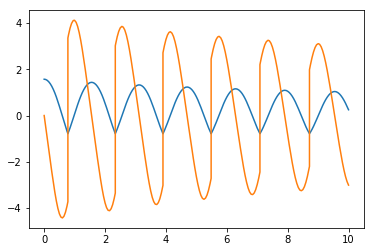

In [8]:
import numpy as N
import pylab as P
import nose
from assimulo.solvers import CVode
from assimulo.problem import Explicit_Problem
#http://www.jmodelica.org/assimulo_home/_modules/assimulo/examples/cvode_with_disc.html

def f(t,y,sw):
    """
    The ODE to be simulated. The parameter sw should be fixed during
    the simulation and only be changed during the event handling.
    """
    l=1.0
    g=9.81
    yd_0 = y[1]
    yd_1 = -g/l*N.sin(y[0])

    return N.array([yd_0, yd_1])

def state_events(t,y,sw):
    """
    This is the function that keeps track of  events. When the sign
    of any of the functions changed, we have an event.
    """
    if sw[0]:
        e_0 = y[0]+N.pi/4.
    else:
        e_0 = y[0]

    return N.array([e_0])

def handle_event(solver, event_info):
    """
    Event handling. This functions is called when Assimulo finds an event as
    specified by the event functions.
    """
    state_info = event_info[0] #We are only interested in state events

    if state_info[0] != 0: #Check if the first event function has been triggered

        if solver.sw[0]: #If the switch is True the pendulum bounces
            solver.y[1] = -0.9*solver.y[1] #Change the velocity and lose energy

        solver.sw[0] = not solver.sw[0] #Change event function

        #Initial values
y0 = [N.pi/2.0, 0.0] #Initial states
t0 = 0.0             #Initial time
switches0 = [True]   #Initial switches

#Create an Assimulo Problem
mod = Explicit_Problem(f, y0, t0, sw0=switches0)

mod.state_events = state_events #Sets the state events to the problem
mod.handle_event = handle_event #Sets the event handling to the problem
mod.name = 'Pendulum with events'   #Sets the name of the problem

#Create an Assimulo solver (CVode)
sim = CVode(mod)

#Specifies options
sim.discr = 'Adams'     #Sets the discretization method
sim.iter = 'FixedPoint' #Sets the iteration method
sim.rtol = 1.e-8        #Sets the relative tolerance
sim.atol = 1.e-6        #Sets the absolute tolerance

#Simulation
ncp = 200     #Number of communication points
tfinal = 10.0 #Final time

t, y = sim.simulate(tfinal, ncp) #Simulate

#Plots the result
P.plot(t,y)
P.show()
